In [3]:
import matplotlib   # plotting libraries  
import matplotlib.pyplot as plt# plotting libraries  
import cmath as cm  # complex math
import numpy as np  # numerical routines 
import matplotlib.cm as cmap  ## color map for 2d plotting
#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}',r'\usepackage{amssymb}']
%matplotlib inline  
pi2 = cm.pi * 2.0
d2r = np.pi/180.0

### How do we combine plane waves into a complex structure with an interesting power spectrum?

#### The Power Spectrum (or PSD)

We have learned that the power spectrum tells us about the amplitudes of the sin/cos coefficients used to recreate our original series. We have seen that the PSD of a sine wave with a specific (single) frequency should have single peaks at those specific frequencies. We have used the power spectrum to identify annual temperature fluctuations in temperature data.

But turbulence is a whole separate game. First, we are switching from 1D to 2D (or 3D). Our goal is to map out the atmosphere's properties as a function of location and time. We do not have this information (i.e., the time series of observations against their positions). What we have to work with is the frequency and scale (wavelength) data. We will watch the temperatures fluctuate over time and we will characterize those fluctuations as waves with observable frequencies. 

Let us start with the 1-d Fourier Transform of the vertical velocity (w):

\begin{equation}
W(k)= \frac{1 }{2 \pi} \int_{-\infty}^\infty w e^{ik x}dx
\end{equation}
(where I've switched to spatial wavenumber=$k=2\pi/\lambda$ instead of frequency $f$).

We define the  one-dimensional spatial autocovariance as:

\begin{equation}
cov_{ww}(r) = \Gamma(r) =\int_{-\infty}^\infty w(x) w(x + r) dr
  \label{auto}
\end{equation}
(note the stationarity assumption -- there is no dependence on our starting point $x$.  Also note
that I've already removed the mean from $w$).

We take the Fourier transform of the covariance to get the power spectrum (the $\rm \it{Wiener-Khinchin}$ theorem):

\begin{gather}
  E(k) = \frac{ 1}{2 \pi} \int_{-\infty}^\infty  e^{ik r} \Gamma(r) dr\\
       = W(k) W^*(k) = |W|^2
  \label{eq:ftcorr}
\end{gather}
where the $^*$ denotes the complex conjugate.
 If the integral
\begin{equation}
  \label{eq:energy}
  \int_0^\infty E(k) dk < \infty,
\end{equation}
exists then the field is homogeneous (i.e.~spatially stationary) such that $w(x) =  w(x + r)$ or $r=0$. We can write the covariance as:

\begin{gather}
  \label{eq:variance}
\Gamma(0) = \sigma_w^2 = \int_{-\infty }^{\infty} E(k)\!\,d k.
\end{gather}


Also note that the inverse transform to get the autocorrelation from the power spectrum is:

\begin{equation}
  \label{eq:inverse}
    \Gamma(r) =  \int_{-\infty}^\infty  e^{-ik r} E(k) dk\\
\end{equation}

This relationship between the correlation and the power spectrum
is called the $\rm \it{Wiener-Khinchin}$ theorem.





#### Wiener-Khinchin in action

On page 65 of the Lena et al. book, they introduce the structure function with regards to temperature fluctuations.

Specifically, they state that the covariance of the temperature fluctuations (in space) is:

\begin{equation}
B_T(\bf{\rho}) = \langle \Theta(\bf{r})\Theta(\bf{r + \rho})\rangle
\end{equation}
where $\Theta$ is some random variable. This is the definition of the structure function up to a constant (see below).

Using the Weiner-Khinchin theorem:
$$B_T(\bf{\rho}) = \int_{\bf{\kappa}} \Phi_T(\bf{\kappa})\ e^{-2\pi{\bf{\kappa * \rho}}} \ d \bf{\kappa}$$

In other words, the structure function $B_T(\bf{\rho})$ is just the Fourier Transform of the power spectrum of the density fluctuations. This is specific use of the Weiner-Khinchin theorem.

When the book states:

$$D_T(\bf{\rho}) = \langle | \Theta(\bf{r}) - \Theta(\bf{r + \rho})|^2\rangle$$
they are defining the 2D structure function. 

#### Structure Functions

In many cases it is easier to think about variability in the spatial domain, because local eddies have
fourier transforms that are spread over many wavenumbers. Measurements of the structure function provide insight into the spatial and temporal variability of turbulence – including a quantitative definition of the intermittency.

How does the above derivation relate to the structure function?  The definition of the  one dimensional 2nd order structure function is:

\begin{equation}
S_2(x,r)=\langle \left[ f(x) - f(x+r) \right] ^ 2 \rangle
\label{eq:sfensemble}
\end{equation}
where the angled brackets denote an ensemble average.  If we write $f(x)=f_1$ and
$f(x + r) = f_2$ , then $S_2(x,r)$ is equivalent to:

\begin{equation}
S_2=\langle \left[ f_2 - f_1 \right] ^ 2 \rangle = \langle f_2^2 \rangle +  \langle f_1^2 \rangle  - 2 \langle f_2 f_1 \rangle 
\label{eq:sfensemble2}
\end{equation}

If the fields are stationary, then $\langle f_1^2 \rangle = \langle f_2^2 \rangle$  = (the variance of $f(x)) = \langle f^2 \rangle = \Gamma(0)$ and
in the same way we can write $\langle f_2 f_1 \rangle = \langle f(x+r) f(x) \rangle = \Gamma(r)$. Therefore
$S_2$ becomes:

\begin{equation}
S_2= 2 \left ( \Gamma(0) - \Gamma(r) \right )
\label{eq:sfensemble3}
\end{equation}


Using the inverse FFT and the variance,  we
can rewrite the above equation as

\begin{equation}
\begin{split}
S_2= 2 \int_{-\infty }^{\infty} \left ( 1 - e^{-ikr} \right ) E(k) \!\,dk  = 2 \int_{-\infty }^{\infty} \left ( 1 - (\cos(-kr) + i \sin(-kr)) \right ) E(k) \!\,dk\\
= 2 \int_{-\infty }^{\infty} \left ( 1 - \cos(-kr) \right ) E(k) \!\,dk
\label{eq:sfensemble4}
\end{split}
\end{equation}
where we have dropped the sin term since $E(k)$ is even and $\sin(-kr)$ is odd, so that their product will integrate to 0 from $-\infty$ to $\infty$.

#### Extension to 2-dimensions

The main change in moving to two dimensions is that position and wavenumber
are both vectors.  In this case 
the structure function $S_p(\overrightarrow{x},\overrightarrow{r})$ of order $p$
of a field $\tau(\overrightarrow{x})$ is given by:
\begin{equation}
\label{eq:sfp}
S_p(\overrightarrow{ x},\overrightarrow{ r})=
\langle \left| \tau(\overrightarrow{ x}) - \tau(\overrightarrow{ x} +\overrightarrow{r}) \right| ^ p \rangle,
\end{equation}
where ${\bf x}$ is the position, ${\bf r}$ is a lag with respect to 
${\bf x}$, and the angled braces, $ \langle \cdot \rangle $, indicate an 
ensemble average. 

The second-order structure function $S_2$ is obtained 
by setting $p=2$.
The spectral density, $\Psi(\bf k)$, of a 
statistically homogeneous  (but
possibly anisotropic) two-dimensional random field,  $\tau(\overrightarrow{ x})$, is defined by

\begin{equation}
\label{eq:covar}
\Psi(\overrightarrow{ k})  = (2\pi)^{-2} \int \left\langle \tau(0)\tau({\bf r})\right\rangle e^{ i {\bf k} \cdot {\bf r}}  \ d^2r 
 =   \left|  \int \tau(\overrightarrow{ x}) e^{i {\bf k} \cdot {\bf x}}  \ d^2x  \right|^2,
\end{equation}

where ${\bf x} = \left[ x,y \right]$ is the position, 
$\left\langle \tau(0)\tau(\overrightarrow{r})\right\rangle$ is the (auto) covariance
function at lag $\overrightarrow{ r}=\overrightarrow{ x}^\prime - \overrightarrow{ x} = \left [ r_x, r_y \right ]$, 
the angled braces, $ \langle \cdot \rangle $, indicate an
ensemble average (i.e., an average over all possible realizations of the field),
$\overrightarrow{ k}=\left [ k_x, k_y \right ]$ is the wave number, and the integrals are 
over all of the respective space, with $d^2r = dx\,dy$ in Cartesian coordinates.
This is the 2-d version of  Wiener-Khinchin formula,
which says that the spectral density $\Psi(\overrightarrow{ k})$ is the modulus squared of the Fourier 
transform of the field $\tau(\overrightarrow{ x})$ itself.

We can define a one-dimensional energy spectrum for the two-dimensional field
by integrating around a circle. Remembering that $d\overrightarrow{k} = k d\theta dk$:

\begin{equation}
\label{eq:isoespec}
E(k) = \int_0^{2\pi} \Psi(\overrightarrow{ k})\ k \ d\theta,
\end{equation}

If the field is statistically isotropic, then $\Psi(\overrightarrow{k}) = \Psi(k)$,
and
$E(k)=2\pi k\Psi(k)$, but even if $\Psi$ depends on $\theta$ the above equation 
is still valid.

#### Scaling

Structure functions often scale. The boom presents an argument that the structure of energy scales via the Kolmogorov -3/5 power law:

$$E(k) \propto k^{-5/3}$$

Kolmogorov defined the problems as: :the power spectral density of energy fluctuations (in 1d) is equal to:
$$E(k) \approx C\ \epsilon^x\ k^y$$

In class, we discussed how this can be derived purely from dimensional arguments. To do so, we look carefully at the units on the left. What we "mean" by energy is Energy per $\delta k$ (where k is the wavenumber) per unit mass. What we mean by Energy flow ($\epsilon$) is then defined as energy/mass/time.

Now, given that energy has units of $\frac{mass\ \times\ length^2}{time^2}$, we find that $\epsilon$ has units:
$$\frac{mass\ \times\ length^2}{time^2}\times\ \frac{1}{time}\times\ \frac{1}{mass} = \frac{length^2}{time^3}$$

Energy$/\Delta k\ (k)$ has units:
$$\frac{mass\ \times\ length^2}{time^2}\ \times \frac{1}{1/length}\times\ \frac{1}{mass} = \frac{length^3}{time^2}$$

Finally, we write the structure equation as:
$$\frac{length^3}{time^2} = \big(\frac{length^2}{time^3}\big)^x \times \big(\frac{1}{length}\big)^y$$

To solve this problem, balance the top and the bottom exponents separately to arrive at x=2/3 and y = -5/3.

<font color='red'>HW Question 7: The Structure Function of Velocity Pertubations </font>
    
Consider the fluctation in velocity $\delta v(x,l) = v(x) - v(x+l)$. Using dimensional argumments, solve for the 2nd and 3rd order structure functions in terms of their scaling (to a power).

## Now let's use these concepts to make, characterize, and interpret some SKY!

In [4]:
### I borrowed this from https://github.com/Astroua/TurbuStat It is a convenience function for rfft.
def rfft_to_fft(image, keep_rfft=False, use_pyfftw=False,
                threads=1, **pyfftw_kwargs):
    '''
    Perform a RFFT on the image (2 or 3D) and return the absolute value in
    the same format as you would get with the fft (negative frequencies).
    This avoids ever having to have the full complex cube in memory.
    Inputs
    ------
    image : numpy.ndarray
        2 or 3D array.
    keep_rfft : bool, optional
        Return the rfft output instead of expanding to the
        negative frequencies of the full FFT.
    use_pyfftw : bool, optional
        Try using pyfftw for the FFT.
    threads : int, optional
        Number of threads to use when using pyfftw. Default is 1.
    pyfftw_kwargs : Passed to `~pyfftw.interfaces.numpy_fft.rfftn`.
    Outputs
    -------
    fft_abs : absolute value of the fft.
    '''

    ndim = len(image.shape)

    if ndim < 2 or ndim > 3:
        raise TypeError("Dimension of image must be 2D or 3D.")

    last_dim = image.shape[-1]

    if use_pyfftw:
        if PYFFTW_FLAG:
            fft_abs = np.abs(rfftn(image, **pyfftw_kwargs))
        else:
            use_pyfftw = False
            warn("pyfftw is not installed")

    if not use_pyfftw:
        fft_abs = np.abs(np.fft.rfftn(image))

    if keep_rfft:
        return fft_abs

    if ndim == 2:
        if last_dim % 2 == 0:
            fftstar_abs = fft_abs.copy()[:, -2:0:-1]
        else:
            fftstar_abs = fft_abs.copy()[:, -1:0:-1]

        fftstar_abs[1::, :] = fftstar_abs[:0:-1, :]

        return np.concatenate((fft_abs, fftstar_abs), axis=1)

    elif ndim == 3:
        if last_dim % 2 == 0:
            fftstar_abs = fft_abs.copy()[:, :, -2:0:-1]
        else:
            fftstar_abs = fft_abs.copy()[:, :, -1:0:-1]

        fftstar_abs[1::, :, :] = fftstar_abs[:0:-1, :, :]
        fftstar_abs[:, 1::, :] = fftstar_abs[:, :0:-1, :]

        return np.concatenate((fft_abs, fftstar_abs), axis=2)

In [16]:
def wave_box_2d(wavenumber):
    # Zero our the arrays
    wave_box = np.zeros((100,100,100))
    wave_box_avg = np.zeros((100,100))
    x = np.linspace(0.0,1.0,100,dtype='float')
    y = x

    ii = wavenumber
    k = pi2*float(ii)
    for jj in range(100):
        ang = np.random.randint(0,360)
        kx = k*np.cos(ang*d2r)
        ky = k*np.sin(ang*d2r)
        for a in range(len(x)):
            for b in range(len(y)):
                wave_box[a,b,jj] = np.sin(kx*x[a] + ky*y[b])
    
    #Zero our the power_box that is the average of the directions of the plane-waves
    wave_box_avg = np.zeros((100,100))
    
    #Loop over the directions and report back the average
    for a in range(100):
        for b in range(100):
            wave_box_avg[a,b] = np.mean(wave_box[a,b,:]) + wave_box_avg[a,b]
        
    return wave_box_avg

In [17]:
wave_vec = [1]
wave_box = wave_box_2d(wave_vec[0])

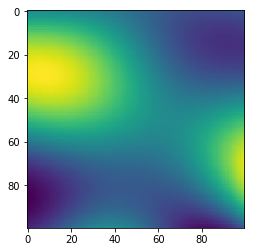

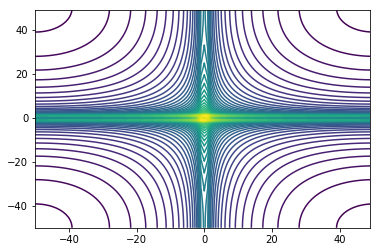

In [18]:
plt.imshow(wave_box)
plt.show()
fft = np.fft.fftshift(rfft_to_fft(wave_box))
fx = np.fft.fftfreq(100,0.01)
fy = np.fft.fftfreq(100,0.01)
plt.contour(np.fft.fftshift(fx),np.fft.fftshift(fy),np.log(fft**2.0),50)
plt.show()

In [19]:
wave_box_tot = []
wave_vec = [1,5,10,20,40]
for i in range(len(wave_vec)):
    wave_box = wave_box_2d(wave_vec[i])
    if (i == 0):
        wave_box_tot = wave_box
    else:
        wave_box_tot = wave_box_tot + wave_box

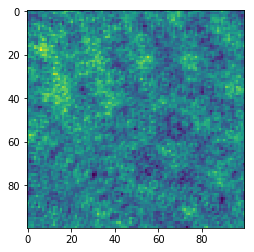

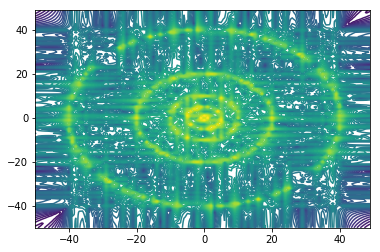

In [20]:
plt.imshow(wave_box_tot)
plt.show()
fft = np.fft.fftshift(rfft_to_fft(wave_box_tot))
fx = np.fft.fftfreq(100,0.01)
fy = np.fft.fftfreq(100,0.01)
plt.contour(np.fft.fftshift(fx),np.fft.fftshift(fy),np.log(fft**2.0),50)
plt.show()

Can we reverse it?

In [21]:
fft_inverse = np.fft.fftshift(rfft_to_fft(fft))

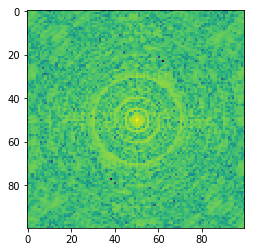

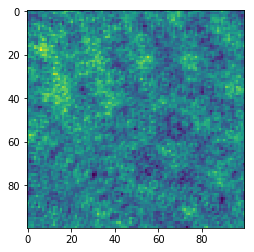

In [23]:
plt.imshow(np.log(fft_inverse))
plt.show()
plt.imshow(wave_box_tot)
plt.show()

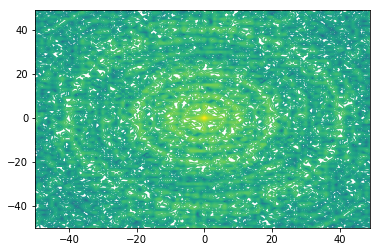

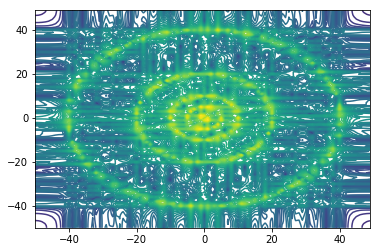

In [14]:
fft_recovered = np.fft.fftshift(rfft_to_fft(fft_inverse))
fx = np.fft.fftfreq(100,0.01)
fy = np.fft.fftfreq(100,0.01)
plt.contour(np.fft.fftshift(fx),np.fft.fftshift(fy),np.log(fft_recovered**2.0),50)
plt.show()
plt.contour(np.fft.fftshift(fx),np.fft.fftshift(fy),np.log(fft**2.0),50)
plt.show()

<font color='red'>HW Question 8: A Kolmogorov sky </font>

    Using what you have learned, create a sky that has Kolmogorov -5/3 scaling. Show the picture of the sky and measure the power spectrum on that data to show that it works.


https://turbustat.readthedocs.io/en/latest/generating_test_data.html#two-dimensional-images